# Домашнее задание 1
## 1.1. Структура базы данных
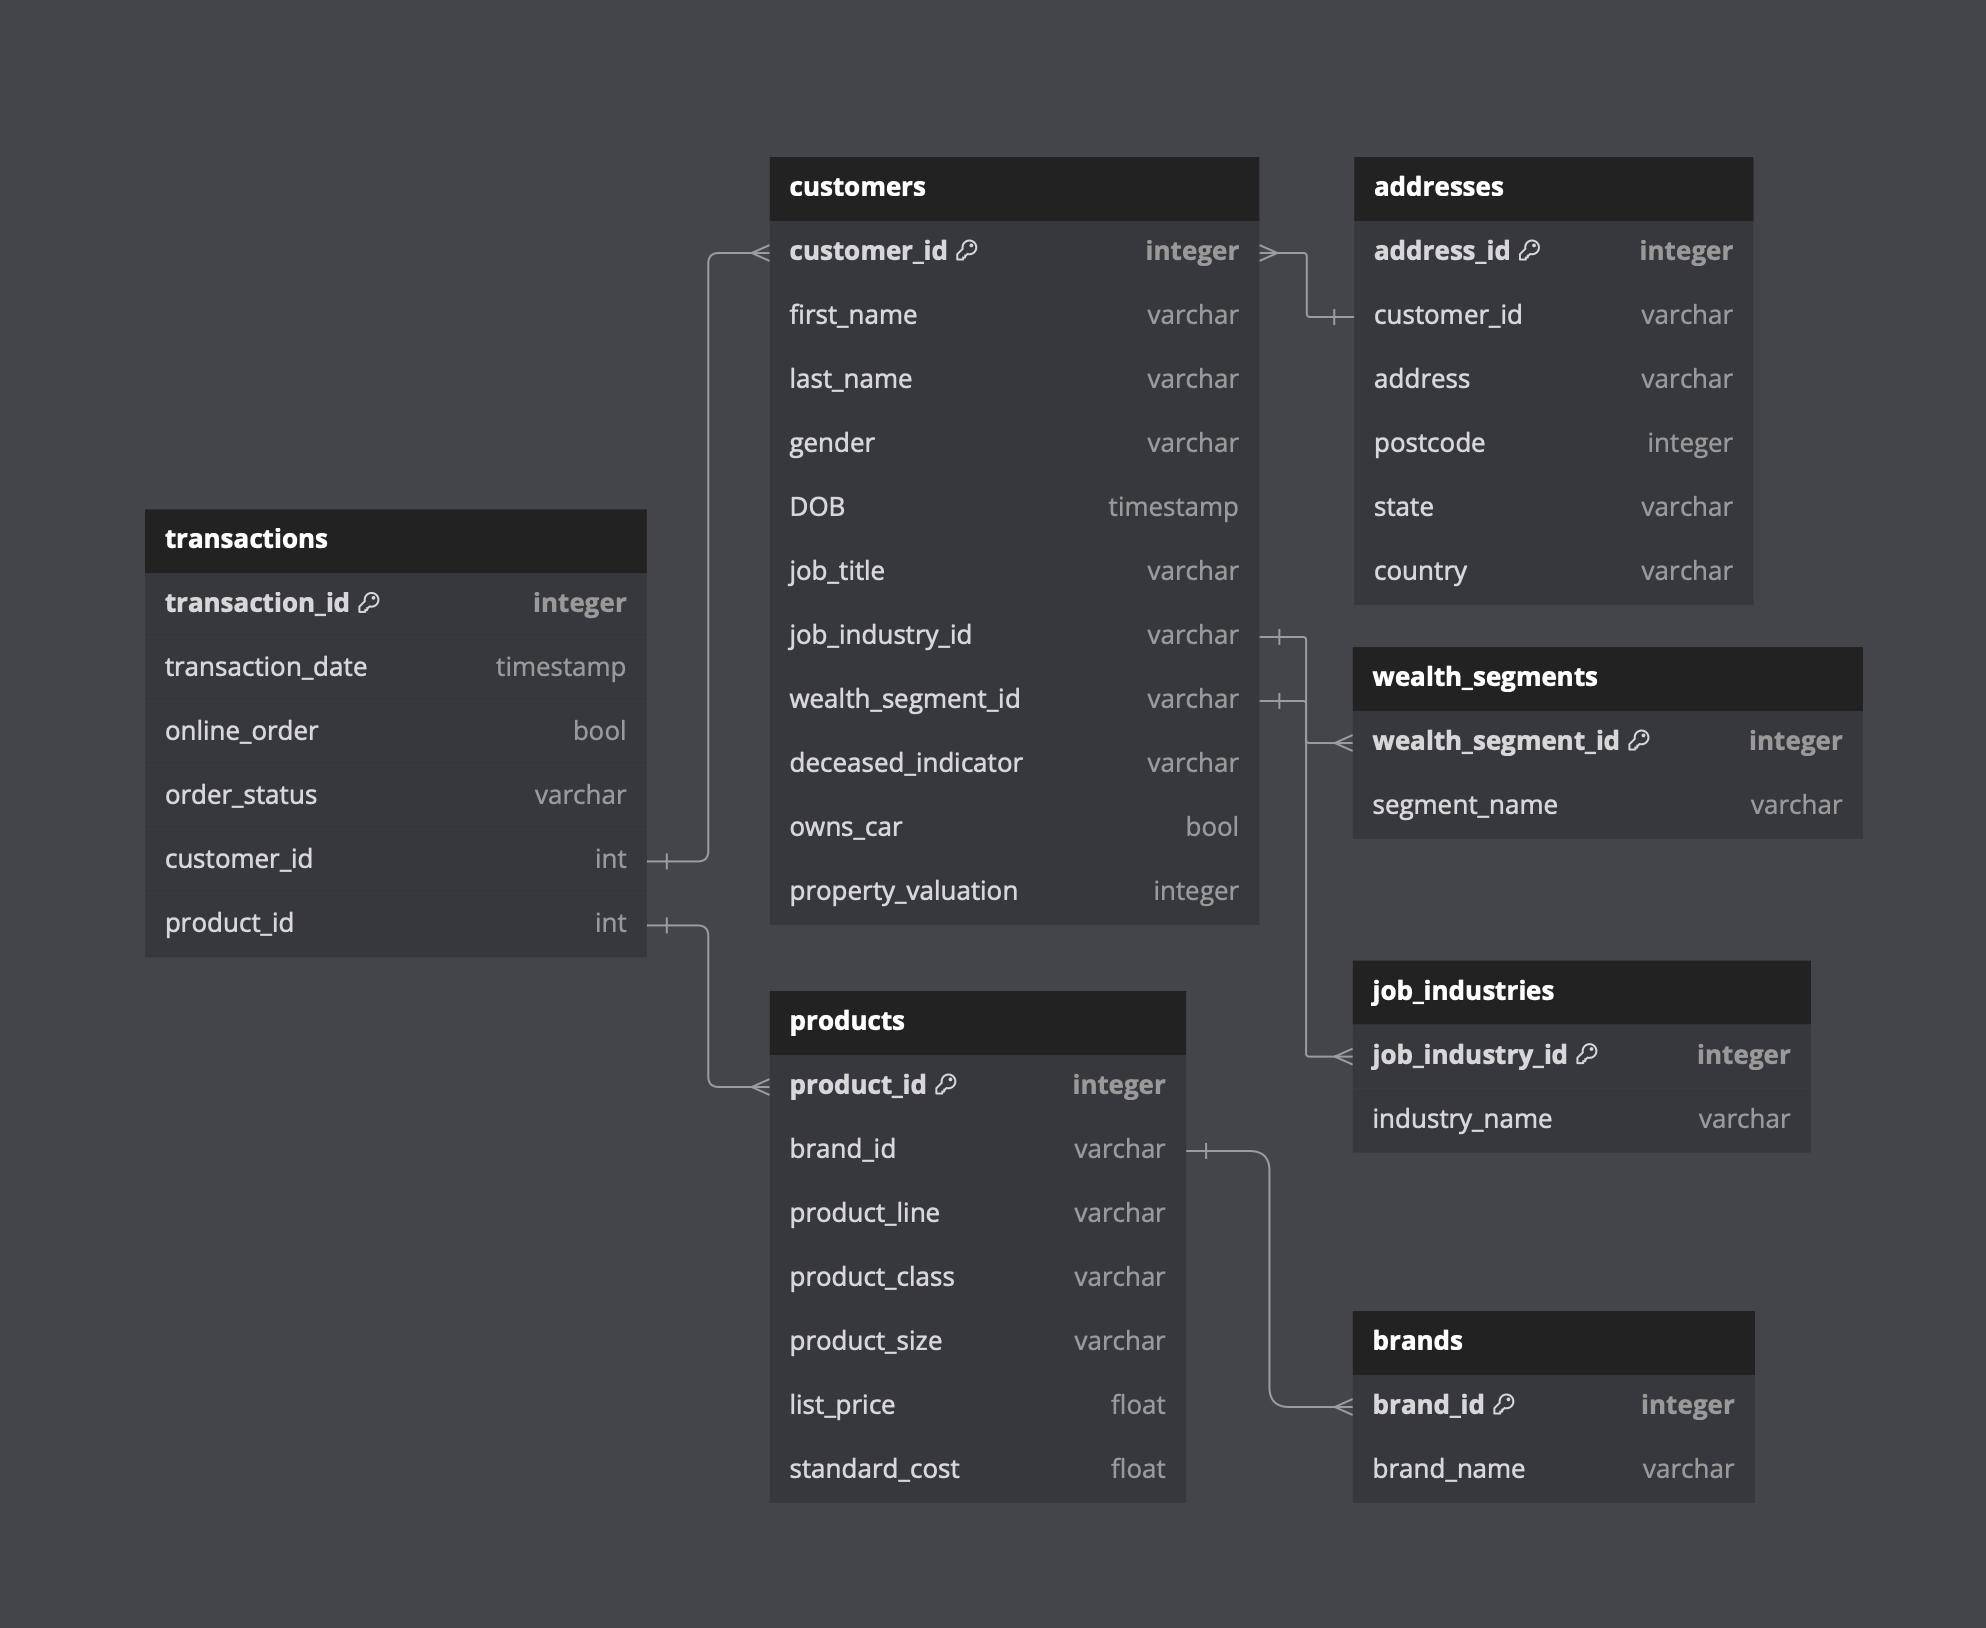

## 1.2.Нормализация базы данных

1НФ. Все поля по умолчанию содержат атомарные значения.

2НФ. Каждая таблица имеет простой первичный ключ, и все неключевые поля зависят полностью от него.
- В transactions ключ – transaction_id, а все остальные поля зависят именно от него.
- В products ключ – product_id, а остальные атрибуты полностью зависят от него.
- В customers ключ – customer_id, все данные о клиенте зависят от него.
- В adresses ключ – address_id, все данные об адресах зависят от него.
- В wealth_segment ключ - wealth_segment_id, все данные о сегментах зависят от него.
- В job_industies ключ - job_industy_id, все данные об индустриях зависят от него.
- В brands ключ - brand_id, все данные о брендах зависят от него.

3НФ.Отсутствуют транзитивные зависимости:
— В Customers информация об адресе отделена в отдельную таблицу, чтобы данные о местоположении не зависели от других атрибутов покупателя.
— Информация о товаре вынесена в таблицу Products, что устраняет дублирование (например, бренд, класс и цена товара не повторяются в каждой транзакции).
- Информация о сегменте, индустрии и бренде вынесена в отдельные таблицы.

## 1.3. Создание таблиц в DBeaver
```sql
CREATE TABLE wealth_segments (
    wealth_segment_id INTEGER PRIMARY KEY,
    wealth_name VARCHAR(255) NOT NULL
);

CREATE TABLE job_industries (
    job_industry_id INTEGER PRIMARY KEY,
    industry_name VARCHAR(255) NOT NULL
);

CREATE TABLE brands (
    brand_id INTEGER PRIMARY KEY,
    brand_name VARCHAR(255) NOT NULL
);

CREATE TABLE customers (
    customer_id INTEGER PRIMARY KEY,
    first_name VARCHAR(255) NOT NULL,
    last_name VARCHAR(255) NOT NULL,
    gender VARCHAR(50),
    DOB TIMESTAMP,
    job_title VARCHAR(255),
    job_industry_id INTEGER,
    wealth_segment_id INTEGER NOT NULL,
    deceased_indicator VARCHAR(10) NOT NULL,
    owns_car BOOLEAN,
    property_valuation INTEGER NOT NULL,
    CONSTRAINT fk_customers_job_industry FOREIGN KEY (job_industry_id)
        REFERENCES job_industries(job_industry_id),
    CONSTRAINT fk_customers_wealth_segment FOREIGN KEY (wealth_segment_id)
        REFERENCES wealth_segments(wealth_segment_id)
);

CREATE TABLE products (
    product_id INTEGER PRIMARY KEY,
    brand_id INTEGER NOT NULL,
    product_line VARCHAR(255) NOT NULL,
    product_class VARCHAR(255) NOT NULL,
    product_size VARCHAR(255) NOT NULL,
    list_price FLOAT NOT NULL,
    standard_cost FLOAT NOT NULL,
    CONSTRAINT fk_products_brand FOREIGN KEY (brand_id)
        REFERENCES brands(brand_id)
);

CREATE TABLE addresses (
    address_id INTEGER PRIMARY KEY,
    customer_id INTEGER NOT NULL,
    address VARCHAR(255) NOT NULL,
    postcode INTEGER NOT NULL,
    state VARCHAR(255) NOT NULL,
    country VARCHAR(255) NOT NULL,
    CONSTRAINT fk_addresses_customer FOREIGN KEY (customer_id)
        REFERENCES customers(customer_id)
);

CREATE TABLE transactions (
    transaction_id INTEGER PRIMARY KEY,
    transaction_date TIMESTAMP NOT NULL,
    online_order BOOLEAN NOT NULL,
    order_status VARCHAR(255) NOT NULL,
    customer_id INTEGER NOT NULL,
    product_id INTEGER NOT NULL,
    CONSTRAINT fk_transactions_customer FOREIGN KEY (customer_id)
        REFERENCES customers(customer_id),
    CONSTRAINT fk_transactions_product FOREIGN KEY (product_id)
        REFERENCES products(product_id)
);
```
## 1.4. Загрузка данных в таблицы DBeaver
```sql
-- 1. Таблица brands
CREATE SEQUENCE brands_brand_id_seq 
OWNED BY brands.brand_id;

ALTER TABLE brands
ALTER COLUMN brand_id
SET DEFAULT nextval('brands_brand_id_seq');

INSERT INTO brands (brand_name) 
VALUES 
    ('Solex'),
    ('Trek Bicycles'),
    ('OHM Cycles'),
    ('Norco Bicycles'),
    ('Giant Bicycles'),
    ('WeareA2B')
ON CONFLICT (brand_name) DO NOTHING;

-- 2. Таблица wealth_segments
CREATE SEQUENCE wealth_segments_wealth_segment_id_seq 
OWNED BY wealth_segments.wealth_segment_id;

ALTER TABLE wealth_segments 
ALTER COLUMN wealth_segment_id 
SET DEFAULT nextval('wealth_segments_wealth_segment_id_seq');

INSERT INTO wealth_segments (wealth_name)
VALUES 
    ('Mass Customer'),
    ('Affluent Customer'),
    ('High Net Worth');

-- 3. Таблица job_industries
CREATE SEQUENCE job_industries_job_industry_id_seq 
OWNED BY job_industries.job_industry_id;

ALTER TABLE job_industries 
ALTER COLUMN job_industry_id 
SET DEFAULT nextval('job_industries_job_industry_id_seq');

INSERT INTO job_industries (industry_name)
VALUES 
    ('Health'),
    ('Financial Services'),
    ('Property'),
    ('IT'),
    ('n/a'),
    ('Retail'),
    ('Agriculture'),
    ('Manufacturing'),
    ('Telecommunications'),
    ('Entertainment');

-- 4. Таблица customers
INSERT INTO customers (
    customer_id, first_name, last_name, gender, dob, job_title, 
    job_industry_id, wealth_segment_id, deceased_indicator, owns_car, 
    property_valuation
)
VALUES
    (1, 'Laraine', 'Medendorp', 'F', '1953-10-12', 'Executive Secretary', 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'Health'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Mass Customer'), 
        'N', TRUE, 10)
    (2, 'Eli', 'Bockman', 'Male', '1980-12-16', 'Administrative Officer', 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'Financial Services'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Mass Customer'), 
        'N', TRUE, 10),
    (3, 'Arlin', 'Dearle', 'Male', '1954-01-20', 'Recruiting Manager', 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'Property'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Mass Customer'), 
        'N', TRUE, 9),
    (4, 'Talbot', '', 'Male', '1961-10-03', NULL, 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'IT'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Mass Customer'), 
        'N', FALSE, 4),
    (5, 'Sheila-kathryn', 'Calton', 'Female', '1977-05-13', 'Senior Editor', 
        NULL, 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Affluent Customer'), 
        'N', TRUE, 9),
    (6, 'Curr', 'Duckhouse', 'Male', '1966-09-16', NULL, 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'Retail'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'High Net Worth'), 
        'N', TRUE, 9),
    (7, 'Fina', 'Merali', 'Female', '1976-02-23', NULL, 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'Financial Services'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Affluent Customer'), 
        'N', TRUE, 4),
    (8, 'Rod', 'Inder', 'Male', '1962-03-30', 'Media Manager I', 
        NULL, 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Mass Customer'), 
        'N', FALSE, 12),
    (9, 'Mala', 'Lind', 'Female', '1973-03-10', 'Business Systems Development Analyst', 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'Argiculture'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Affluent Customer'), 
        'N', TRUE, 8),
    (10, 'Fiorenze', 'Birdall', 'Female', '1988-10-11', 'Senior Quality Engineer', 
        (SELECT job_industry_id FROM job_industries WHERE industry_name = 'Financial Services'), 
        (SELECT wealth_segment_id FROM wealth_segments WHERE wealth_name = 'Mass Customer'), 
        'N', TRUE, 4);

-- 5. Таблица addresses
CREATE SEQUENCE addresses_id_seq 
OWNED BY addresses.address_id;

ALTER TABLE addresses 
ALTER COLUMN address_id 
SET DEFAULT nextval('addresses_id_seq');

INSERT INTO addresses (customer_id, address, postcode, state, country)
VALUES 
    (1, '060 Morning Avenue', 2016, 'New South Wales', 'Australia'),
    (2, '6 Meadow Vale Court', 2153, 'New South Wales', 'Australia'),
    (3, '0 Holy Cross Court', 4211, 'QLD', 'Australia'),
    (4, '17979 Del Mar Point', 2448, 'New South Wales', 'Australia'),
    (5, '9 Oakridge Court', 3216, 'VIC', 'Australia'),
    (6, '4 Delaware Trail', 2210, 'New South Wales', 'Australia'),
    (7, '49 Londonderry Lane', 2650, 'New South Wales', 'Australia'),
    (8, '97736 7th Trail', 2023, 'New South Wales', 'Australia'),
    (9, '93405 Ludington Park', 3044, 'VIC', 'Australia'),
    (10, '44339 Golden Leaf Alley', 4557, 'QLD', 'Australia');

-- 6. Таблица products
INSERT INTO products (product_id, brand_id, product_line, product_class, product_size, list_price, standard_cost)
VALUES
    (2,  (SELECT brand_id FROM brands WHERE brand_name = 'Solex'), 'Standard', 'medium', 'medium', 71.49, 53.62),
    (3,  (SELECT brand_id FROM brands WHERE brand_name = 'Trek Bicycles'), 'Standard', 'medium', 'large', 2091.47, 388.92),
    (37, (SELECT brand_id FROM brands WHERE brand_name = 'OHM Cycles'), 'Standard', 'low', 'medium', 1793.43, 248.82),
    (88, (SELECT brand_id FROM brands WHERE brand_name = 'Norco Bicycles'), 'Standard', 'medium', 'medium', 1198.46, 381.10),
    (78, (SELECT brand_id FROM brands WHERE brand_name = 'Giant Bicycles'), 'Standard', 'medium', 'large', 1765.3, 709.48),
    (25, (SELECT brand_id FROM brands WHERE brand_name = 'Giant Bicycles'), 'Road', 'medium', 'medium', 1538.99, 829.65),
    (22, (SELECT brand_id FROM brands WHERE brand_name = 'WeareA2B'), 'Standard', 'medium', 'medium', 60.34, 45.26),
    (15, (SELECT brand_id FROM brands WHERE brand_name = 'WeareA2B'), 'Standard', 'medium', 'medium', 1292.84, 13.44),
    (67, (SELECT brand_id FROM brands WHERE brand_name = 'Solex'), 'Standard', 'medium', 'large', 1071.23, 380.74);

-- 7. Таблица transaction
INSERT INTO transactions (transaction_id, transaction_date, online_order, order_status, customer_id, product_id)
VALUES
    (1, '2017-02-25', FALSE, 'Approved', 1, 2),
    (2, '2017-05-21', TRUE, 'Approved', 2, 3),
    (3, '2017-10-16', FALSE, 'Approved', 3, 37),
    (4, '2017-08-31', FALSE, 'Approved', 4, 88),
    (5, '2017-10-01', TRUE, 'Approved', 5, 78),
    (6, '2017-03-08', TRUE, 'Approved', 6,25),
    (7, '2017-04-21', TRUE, 'Approved', 7, 22),
    (8, '2017-07-15', FALSE, 'Approved', 8, 15),
    (9, '2017-08-10', FALSE, 'Approved', 9, 67);

```
## 1.5.Скриншоты
![Снимок экрана 2025-02-15 в 11.45.05.png](<attachment:Снимок экрана 2025-02-15 в 11.45.05.png>) ![Снимок экрана 2025-02-15 в 11.45.08.png](<attachment:Снимок экрана 2025-02-15 в 11.45.08.png>) ![Снимок экрана 2025-02-15 в 11.45.14.png](<attachment:Снимок экрана 2025-02-15 в 11.45.14.png>) ![Снимок экрана 2025-02-15 в 11.45.17.png](<attachment:Снимок экрана 2025-02-15 в 11.45.17.png>) ![Снимок экрана 2025-02-15 в 11.45.20.png](<attachment:Снимок экрана 2025-02-15 в 11.45.20.png>) ![Снимок экрана 2025-02-15 в 11.45.24.png](<attachment:Снимок экрана 2025-02-15 в 11.45.24.png>)
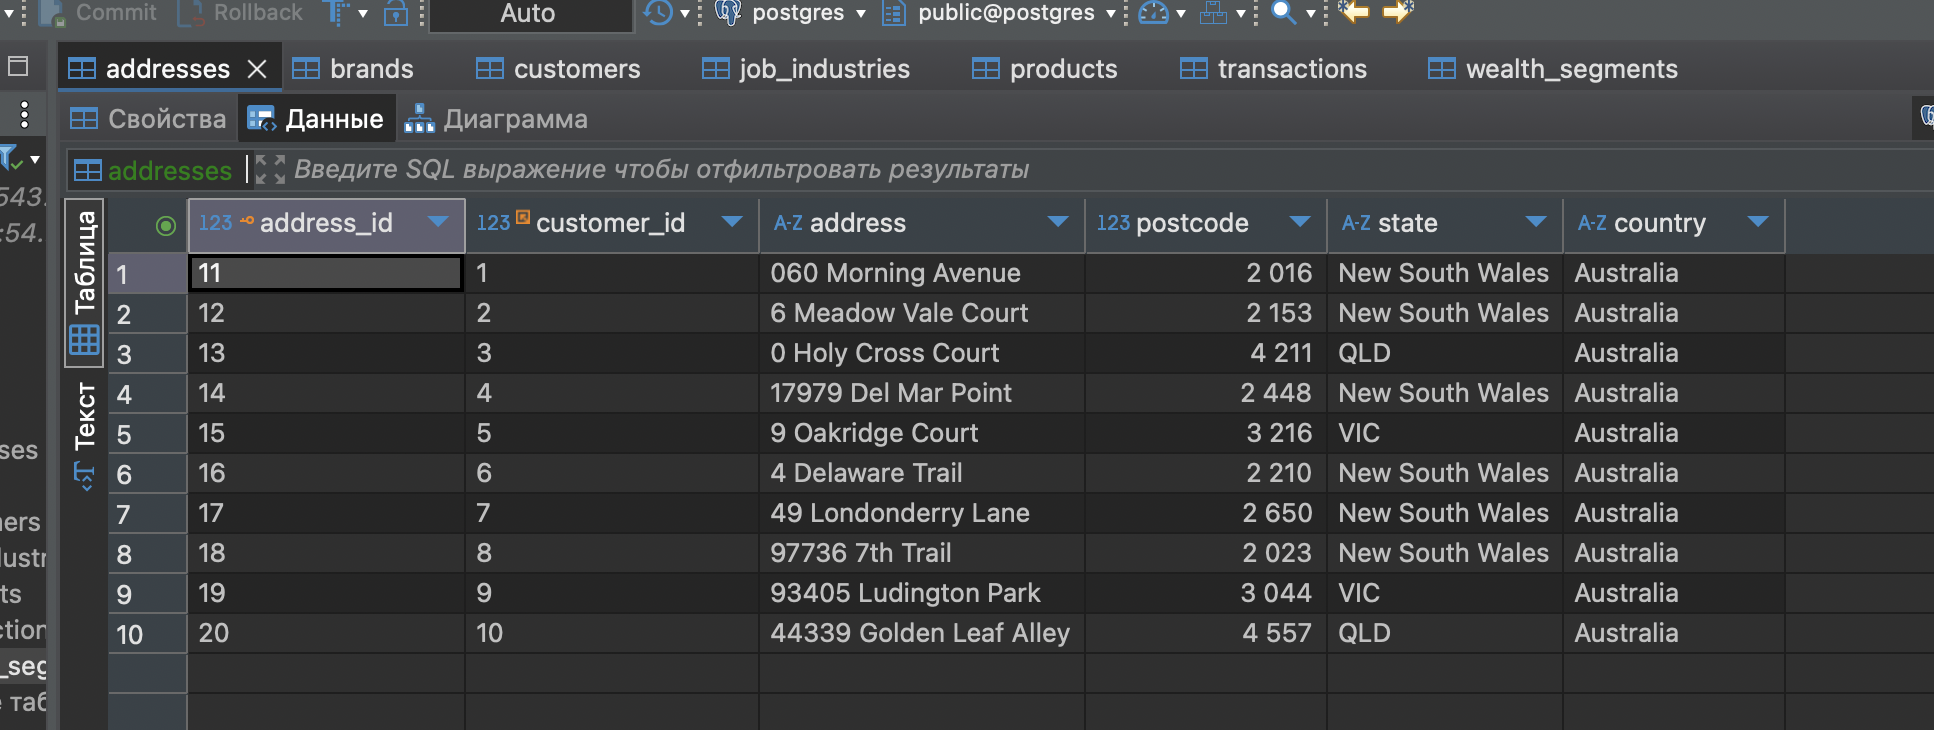
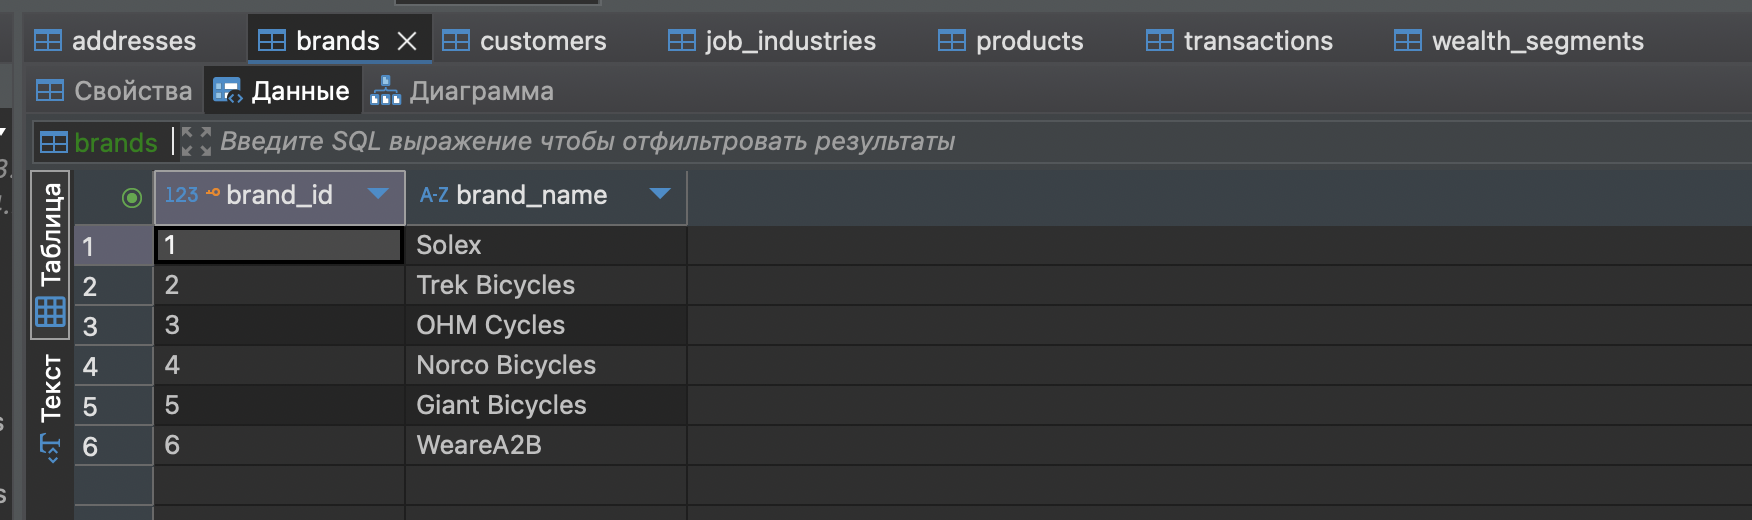
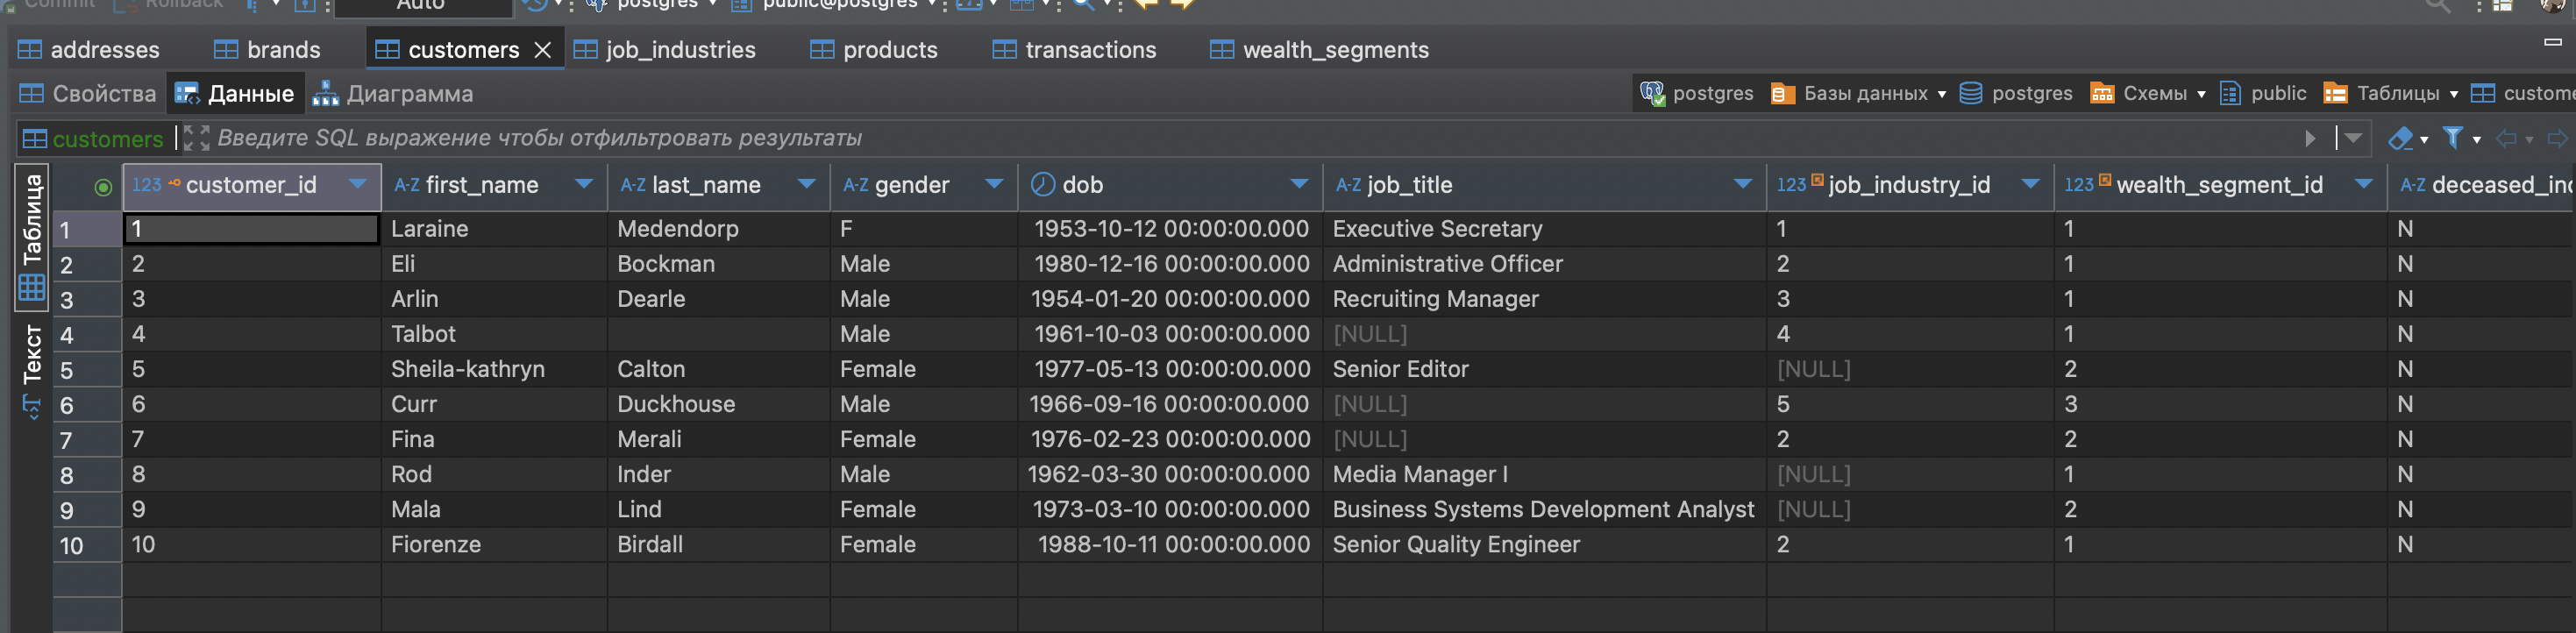
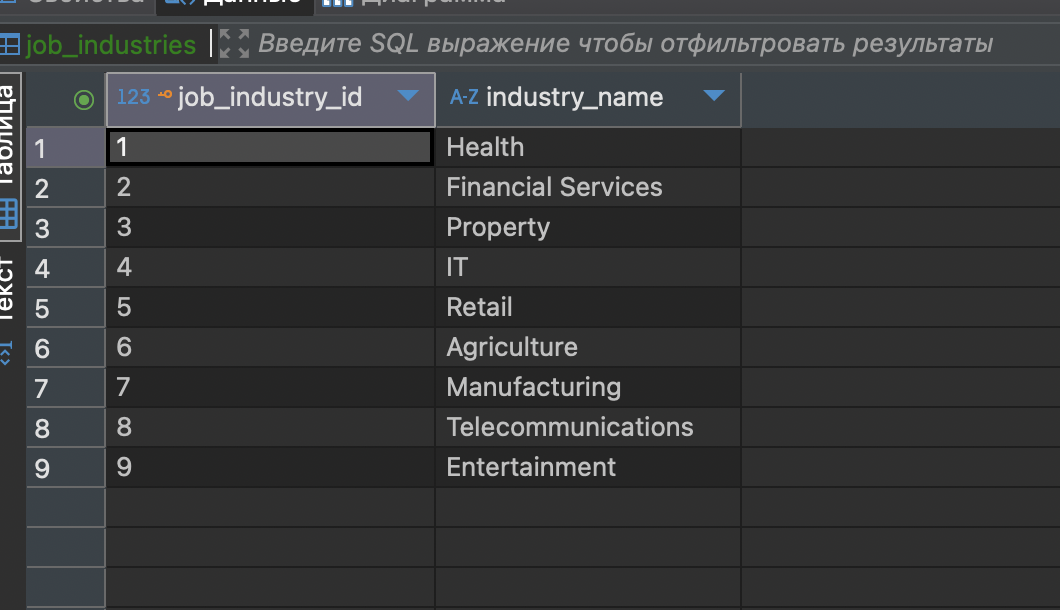
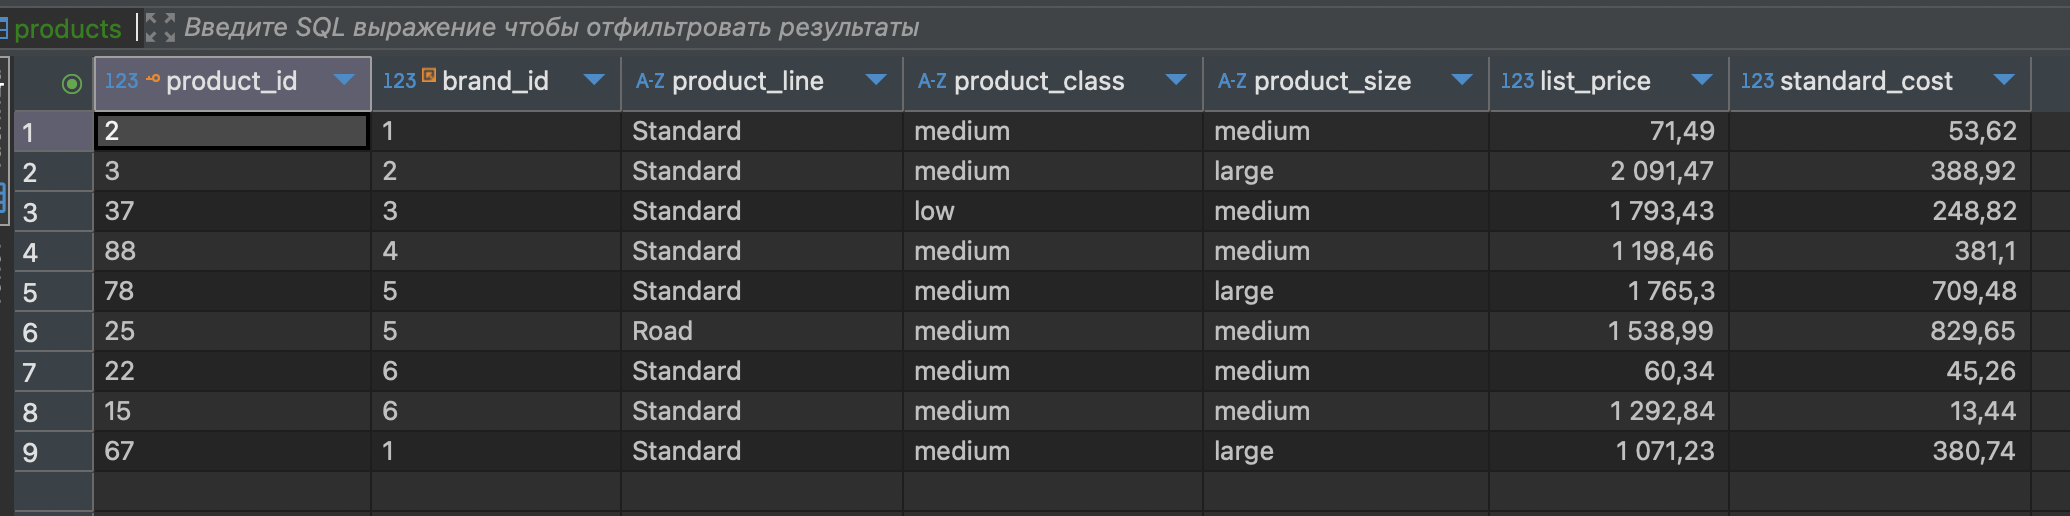
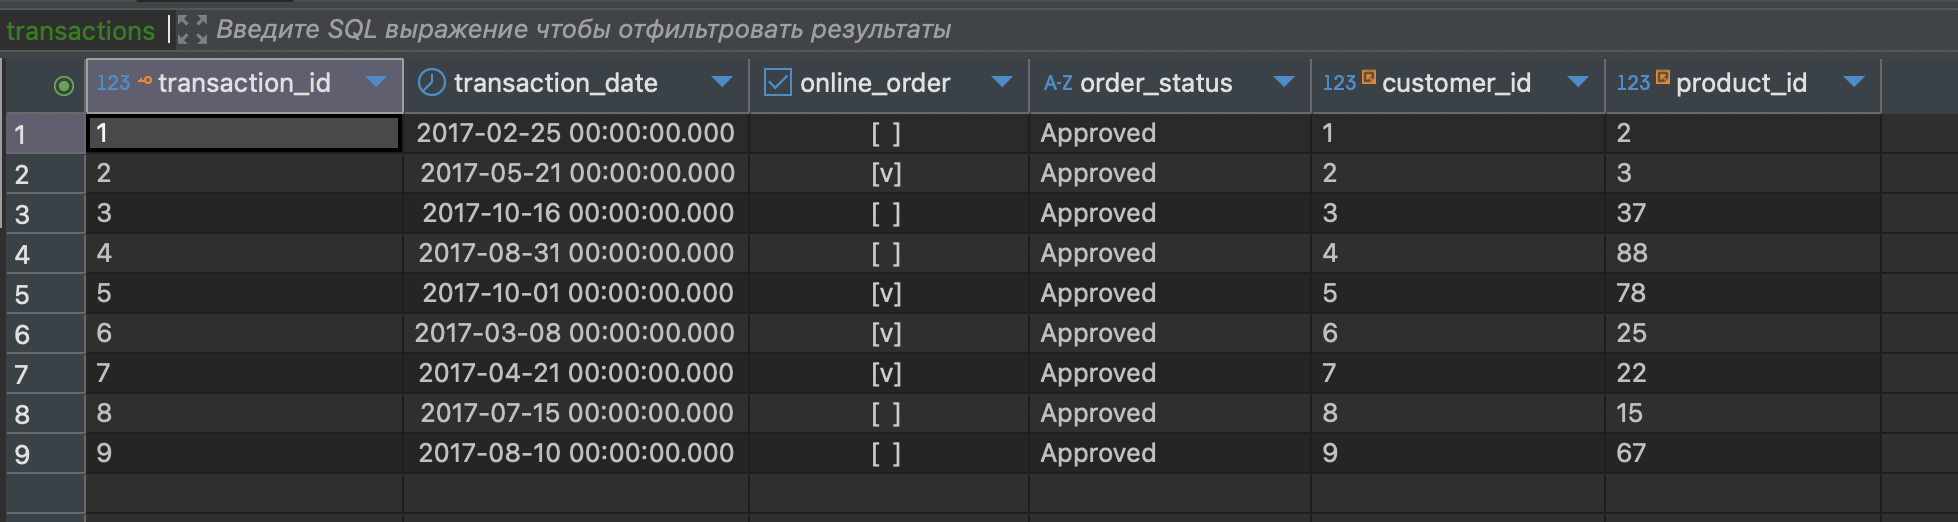